# Life Expectancy around the world (2000 - 2015 full Dataset)


In [1]:
# Created by Jesús García García - Master´s Degree in Big Data Analytics UEM

#  Load Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys._enablelegacywindowsfsencoding()
%matplotlib inline

dataset_path = r"C:\Users\Jesús García\Desktop\Life Expectancy Data.csv"
df = pd.read_csv(dataset_path,  error_bad_lines=False)


df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


#  Exploratory Data Analysis 

In [3]:
#Change country name to id from 1 to 193
df['Country'] = df['Country'].replace(['Afghanistan' , 'Albania' , 'Algeria' , 'Angola' , 'Antigua and Barbuda' , 'Argentina' , 'Armenia' , 'Australia' , 'Austria' , 'Azerbaijan' , 'Bahamas' , 'Bahrain' , 'Bangladesh' , 'Barbados' , 'Belarus' , 'Belgium' , 'Belize' , 'Benin' , 'Bhutan' , 'Bolivia (Plurinational State of)' , 'Bosnia and Herzegovina' , 'Botswana' , 'Brazil' , 'Brunei Darussalam' , 'Bulgaria' , 'Burkina Faso' , 'Burundi' , "Côte d'Ivoire" , 'Cabo Verde' , 'Cambodia' , 'Cameroon' , 'Canada' , 'Central African Republic' , 'Chad' , 'Chile' , 'China' , 'Colombia' , 'Comoros' , 'Congo' , 'Costa Rica' , 'Croatia' , 'Cuba' , 'Cyprus' , 'Czechia' , "Democratic People's Republic of Korea" , 'Democratic Republic of the Congo' , 'Denmark' , 'Djibouti' , 'Dominican Republic' , 'Ecuador' , 'Egypt' , 'El Salvador' , 'Equatorial Guinea' , 'Eritrea' , 'Estonia' , 'Ethiopia' , 'Fiji' , 'Finland' , 'France' , 'Gabon' , 'Gambia' , 'Georgia' , 'Germany' , 'Ghana' , 'Greece' , 'Grenada' , 'Guatemala' , 'Guinea' , 'Guinea-Bissau' , 'Guyana' , 'Haiti' , 'Honduras' , 'Hungary' , 'Iceland' , 'India' , 'Indonesia' , 'Iran (Islamic Republic of)' , 'Iraq' , 'Ireland' , 'Israel' , 'Italy' , 'Jamaica' , 'Japan' , 'Jordan' , 'Kazakhstan' , 'Kenya' , 'Kiribati' , 'Kuwait' , 'Kyrgyzstan' , "Lao People's Democratic Republic" , 'Latvia' , 'Lebanon' , 'Lesotho' , 'Liberia' , 'Libya' , 'Lithuania' , 'Luxembourg' , 'Madagascar' , 'Malawi' , 'Malaysia' , 'Maldives' , 'Mali' , 'Malta' , 'Mauritania' , 'Mauritius' , 'Mexico' , 'Micronesia (Federated States of)' , 'Mongolia' , 'Montenegro' , 'Morocco' , 'Mozambique' , 'Myanmar' , 'Namibia' , 'Nepal' , 'Netherlands' , 'New Zealand' , 'Nicaragua' , 'Niger' , 'Nigeria' , 'Norway' , 'Oman' , 'Pakistan' , 'Panama' , 'Papua New Guinea' , 'Paraguay' , 'Peru' , 'Philippines' , 'Poland' , 'Portugal' , 'Qatar' , 'Republic of Korea' , 'Republic of Moldova' , 'Romania' , 'Russian Federation' , 'Rwanda' , 'Saint Lucia' , 'Saint Vincent and the Grenadines' , 'Samoa' , 'Sao Tome and Principe' , 'Saudi Arabia' , 'Senegal' , 'Serbia' , 'Seychelles' , 'Sierra Leone' , 'Singapore' , 'Slovakia' , 'Slovenia' , 'Solomon Islands' , 'Somalia' , 'South Africa' , 'South Sudan' , 'Spain' , 'Sri Lanka' , 'Sudan' , 'Suriname' , 'Swaziland' , 'Sweden' , 'Switzerland' , 'Syrian Arab Republic' , 'Tajikistan' , 'Thailand' , 'The former Yugoslav republic of Macedonia' , 'Timor-Leste' , 'Togo' , 'Tonga' , 'Trinidad and Tobago' , 'Tunisia' , 'Turkey' , 'Turkmenistan' , 'Uganda' , 'Ukraine' , 'United Arab Emirates' , 'United Kingdom of Great Britain and Northern Ireland' , 'United Republic of Tanzania' , 'United States of America' , 'Uruguay' , 'Uzbekistan' , 'Vanuatu' , 'Venezuela (Bolivarian Republic of)' , 'Viet Nam' , 'Yemen' , 'Zambia' , 'Zimbabwe' , 'Cook Islands' , 'Dominica' , 'Marshall Islands' , 'Monaco' , 'Nauru' , 'Niue' , 'Palau' , 'Saint Kitts and Nevis' , 'San Marino' , 'Tuvalu'], [1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10 ,11 ,12 ,13 ,14 ,15 ,16 ,17 ,18 ,19 ,20 ,21 ,22 ,23 ,24 ,25 ,26 ,27 ,28 ,29 ,30 ,31 ,32 ,33 ,34 ,35 ,36 ,37 ,38 ,39 ,40 ,41 ,42 ,43 ,44 ,45 ,46 ,47 ,48 ,49 ,50 ,51 ,52 ,53 ,54 ,55 ,56 ,57 ,58 ,59 ,60 ,61 ,62 ,63 ,64 ,65 ,66 ,67 ,68 ,69 ,70 ,71 ,72 ,73 ,74 ,75 ,76 ,77 ,78 ,79 ,80 ,81 ,82 ,83 ,84 ,85 ,86 ,87 ,88 ,89 ,90 ,91 ,92 ,93 ,94 ,95 ,96 ,97 ,98 ,99 ,100 ,101 ,102 ,103 ,104 ,105 ,106 ,107 ,108 ,109 ,110 ,111 ,112 ,113 ,114 ,115 ,116 ,117 ,118 ,119 ,120 ,121 ,122 ,123 ,124 ,125 ,126 ,127 ,128 ,129 ,130 ,131 ,132 ,133 ,134 ,135 ,136 ,137 ,138 ,139 ,140 ,141 ,142 ,143 ,144 ,145 ,146 ,147 ,148 ,149 ,150 ,151 ,152 ,153 ,154 ,155 ,156 ,157 ,158 ,159 ,160 ,161 ,162 ,163 ,164 ,165 ,166 ,167 ,168 ,169 ,170 ,171 ,172 ,173 ,174 ,175 ,176 ,177 ,178 ,179 ,180 ,181 ,182 ,183 ,184 ,185 ,186 ,187 ,188 ,189 ,190 ,191 ,192 ,193])
#Change status name to id 1 (Developed) or 0 (Not developed)
df['Status'] = df['Status'].replace(['Developing', 'Developed'],[1, 0])

In [4]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,1,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,1,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,1,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,1,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


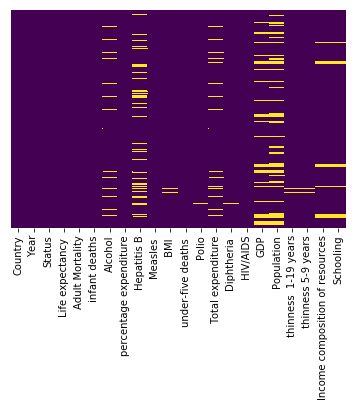

In [5]:
# Check missing data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
df = df.fillna(df.mean())

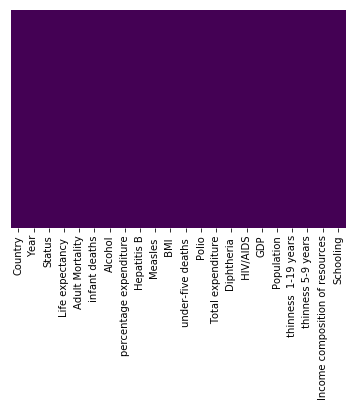

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,1,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,1,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,1,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,1,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null int64
Year                               2938 non-null int64
Status                             2938 non-null int64
Life expectancy                    2938 non-null float64
Adult Mortality                    2938 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2938 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2938 non-null float64
Measles                            2938 non-null int64
 BMI                               2938 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2938 non-null float64
Total expenditure                  2938 non-null float64
Diphtheria                         2938 non-null float64
 HIV/AIDS                          2938 non-null f

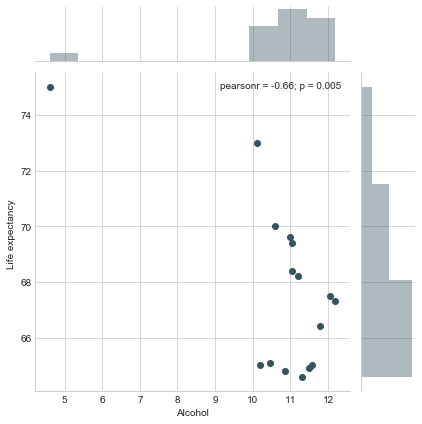

In [10]:
#Alcohol and life expectancy in Russia
#Create a new Dataset
dfrussia = df[['Year','Country','Life expectancy ','Alcohol']].copy()
dfrussia.drop(dfrussia[dfrussia.Country != 134].index, inplace=True)
dfrussia
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
# Drink alcohol, life expentancy

sns.jointplot(x='Alcohol',y='Life expectancy ',data=dfrussia)

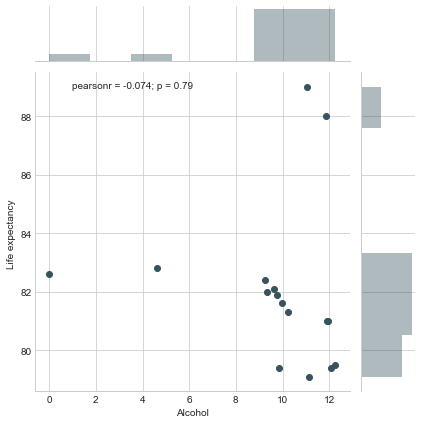

In [11]:
#Alcohol and life expectancy in Spain
#Create a new Dataset
dfspain = df[['Year','Country','Life expectancy ','Alcohol']].copy()
dfspain.drop(dfspain[dfspain.Country != 152].index, inplace=True)
dfspain
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
# Drink alcohol, life expentancy

sns.jointplot(x='Alcohol',y='Life expectancy ',data=dfspain)

# Linear Regression Life Expectancy War countries (2015)

In [12]:
#Create a new dataset with War Countries: Afganistan (1), Algeria (3), Chad (34), Colombia (37), Ethiopia (56), India (75), Philippines (127), Iraq(78), Israel(80), Nigeria (119), Pakistan (122), Congo (39), Russia (134), Somalia (149), Sri Lanka(153), Sudan(154), Thailand (161), Turkey (168),Uganda(170),Ukraine(171),Yemen(181)  Source: https://www.20minutos.es/noticia/404456/0/mundo/guerras/activas/
dfwarcountries = df[['Year','Country','Life expectancy ','Adult Mortality', 'infant deaths', 'GDP']].copy()
#Drop not war countries
dfwarcountries.drop(dfwarcountries[(dfwarcountries.Country != 1) & (dfwarcountries.Country != 3) & (dfwarcountries.Country != 34) & (dfwarcountries.Country != 37) & (dfwarcountries.Country != 56) & (dfwarcountries.Country != 75) & (dfwarcountries.Country != 127) & (dfwarcountries.Country != 78) & (dfwarcountries.Country != 80) & (dfwarcountries.Country != 119) & (dfwarcountries.Country != 122) & (dfwarcountries.Country != 39) & (dfwarcountries.Country != 134) & (dfwarcountries.Country != 149) & (dfwarcountries.Country != 153) & (dfwarcountries.Country != 154) & (dfwarcountries.Country != 161) & (dfwarcountries.Country != 168) & (dfwarcountries.Country != 170) & (dfwarcountries.Country != 171) & (dfwarcountries.Country != 181)].index, inplace=True)
dfwarcountries.drop(dfwarcountries[dfwarcountries.Year != 2015].index, inplace=True)
dfwarcountries

,Year,Country,Life expectancy,Adult Mortality,infant deaths,GDP
0,2015,1,65.0,263.0,62,584.259210
32,2015,3,75.6,19.0,21,4132.762920
528,2015,34,53.1,356.0,46,777.248751
576,2015,37,74.8,143.0,10,644.525556
608,2015,39,64.7,267.0,7,7483.158469
882,2015,56,64.8,225.0,136,645.463763
1186,2015,75,68.3,181.0,910,1613.188780
1234,2015,78,68.9,182.0,32,4974.269300
1266,2015,80,82.5,58.0,0,35729.372530
1893,2015,119,54.5,344.0,483,2655.157977


In [13]:
# Training and Testing Data
# Adult and infant Mortality Linear Regression 
X = dfwarcountries[['Adult Mortality','infant deaths']]
y = dfwarcountries['Life expectancy ']

In [14]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
# Training the Model
from sklearn.linear_model import LinearRegression
# Create an instance of a LinearRegression() model named lm.
lm = LinearRegression()
# Train/fit lm on the training data.
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
# Print out the coefficients of the model
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-0.07256769 -0.0043782 ]


Text(0,0.5,'Predicted Y')

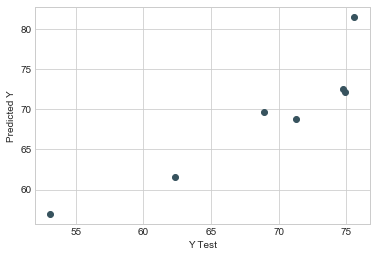

In [17]:
# Predicting Test Data
# Use lm.predict() to predict off the X_test set of the data.
predictions = lm.predict( X_test)
# Create a scatterplot of the real test values versus the predicted values. 
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [18]:
# Evaluating the Model
from sklearn import metrics

# Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. 
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.66630922298
MSE: 9.87388030243
RMSE: 3.14227311073


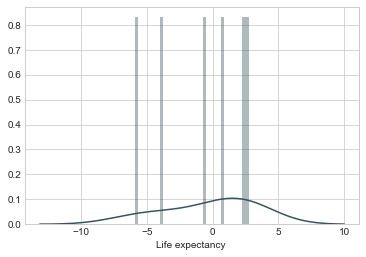

In [19]:
# Residuals
# Plot a histogram of the residuals and make sure it looks normally distributed. 
sns.distplot((y_test-predictions),bins=50);

In [20]:
# Recreate the dataframe below. 
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Adult Mortality,-0.072568
infant deaths,-0.004378


In [21]:
# Interpreting the coefficients:
# Holding all other features fixed, a 1 unit increase in Adult Mortality is associated with a decrease of 0.0725 Life expectancy
# Holding all other features fixed, a 1 unit increase in infant deaths is associated with a decrease of 0.0043 Life expectancy

# Linear Regression Life Expectancy All Word

In [22]:
# Adult and infant Mortality Linear Regression 
X = df[['Adult Mortality','infant deaths']]
y = df['Life expectancy ']

In [23]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [24]:
#Creating and Training the Model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
#Model Evaluation
# print the intercept
print(lm.intercept_)

78.0408862026


In [26]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Adult Mortality,-0.051842
infant deaths,-0.011759


In [27]:
# Interpreting the coefficients:
# Holding all other features fixed, a 1 unit increase in Adult Mortality is associated with a decrease of 0.051842 Life expectancy
# Holding all other features fixed, a 1 unit increase in infant deaths is associated with a decrease of 0.011759 Life expectancy

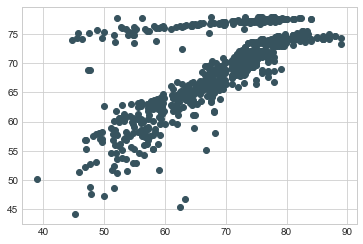

In [28]:
#Predictions from our model
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

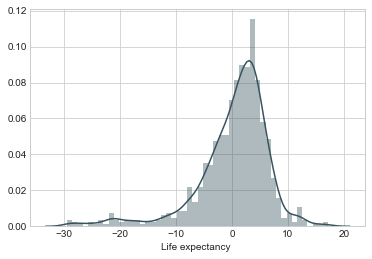

In [29]:
# Residuals
# Plot a histogram of the residuals and make sure it looks normally distributed. 
sns.distplot((y_test-predictions),bins=50);

In [30]:
from sklearn import metrics
# Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. 
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4.66777122769
MSE: 42.8226654566
RMSE: 6.54390292231


# Linear Regression Life Expectancy Spain

In [31]:
dfspain = df[['Year','Country','Life expectancy ','Adult Mortality', 'infant deaths']].copy()
dfspain.drop(dfspain[dfspain.Country != 152].index, inplace=True)
dfspain

,Year,Country,Life expectancy,Adult Mortality,infant deaths
2425,2015,152,82.8,56.0,1
2426,2014,152,82.6,58.0,1
2427,2013,152,82.4,6.0,1
2428,2012,152,82.0,61.0,1
2429,2011,152,82.1,63.0,1
2430,2010,152,81.9,64.0,1
2431,2009,152,81.6,66.0,2
2432,2008,152,81.3,7.0,2
2433,2007,152,89.0,72.0,2
2434,2006,152,88.0,73.0,2


In [32]:
# Adult and infant Mortality Linear Regression 
X = dfspain[['Adult Mortality','infant deaths']]
y = dfspain['Life expectancy ']

In [33]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [34]:
#Creating and Training the Model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
#Model Evaluation
# print the intercept
print(lm.intercept_)

81.9429990873


In [36]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Adult Mortality,-0.000268
infant deaths,0.423163


In [37]:
# Interpreting the coefficients:
# Holding all other features fixed, a 1 unit increase in Adult Mortality is associated with a decrease of 0.000268 Life expectancy
# Holding all other features fixed, a 1 unit increase in infant deaths is associated with an increase of 0.42 Life expectancy

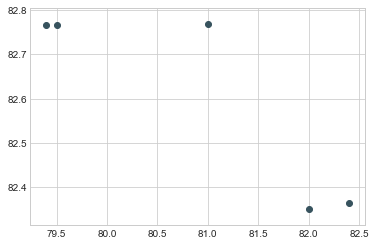

In [38]:
#Predictions from our model
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

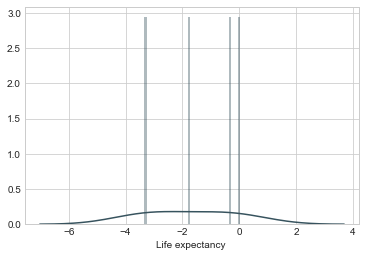

In [39]:
# Residuals
# Plot a histogram of the residuals and make sure it looks normally distributed. 
sns.distplot((y_test-predictions),bins=50);

In [40]:
from sklearn import metrics
# Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. 
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.75760723781
MSE: 5.05251642636
RMSE: 2.24778033321


# Linear Regresion War Countries (Influence of GDP)

In [41]:
#Create a new dataset with War Countries: Afganistan (1), Algeria (3), Chad (34), Colombia (37), Ethiopia (56), India (75), Philippines (127), Iraq(78), Israel(80), Nigeria (119), Pakistan (122), Congo (39), Russia (134), Somalia (149), Sri Lanka(153), Sudan(154), Thailand (161), Turkey (168),Uganda(170),Ukraine(171),Yemen(181)  Source: https://www.20minutos.es/noticia/404456/0/mundo/guerras/activas/
dfwarcountriesall = df[['Year','Country','Life expectancy ','Adult Mortality', 'infant deaths', 'GDP']].copy()
#Drop not war countries
dfwarcountriesall.drop(dfwarcountries[(dfwarcountries.Country != 1) & (dfwarcountries.Country != 3) & (dfwarcountries.Country != 34) & (dfwarcountries.Country != 37) & (dfwarcountries.Country != 56) & (dfwarcountries.Country != 75) & (dfwarcountries.Country != 127) & (dfwarcountries.Country != 78) & (dfwarcountries.Country != 80) & (dfwarcountries.Country != 119) & (dfwarcountries.Country != 122) & (dfwarcountries.Country != 39) & (dfwarcountries.Country != 134) & (dfwarcountries.Country != 149) & (dfwarcountries.Country != 153) & (dfwarcountries.Country != 154) & (dfwarcountries.Country != 161) & (dfwarcountries.Country != 168) & (dfwarcountries.Country != 170) & (dfwarcountries.Country != 171) & (dfwarcountries.Country != 181)].index, inplace=True)
dfwarcountriesall

,Year,Country,Life expectancy,Adult Mortality,infant deaths,GDP
0,2015,1,65.0,263.0,62,584.259210
1,2014,1,59.9,271.0,64,612.696514
2,2013,1,59.9,268.0,66,631.744976
3,2012,1,59.5,272.0,69,669.959000
4,2011,1,59.2,275.0,71,63.537231
5,2010,1,58.8,279.0,74,553.328940
6,2009,1,58.6,281.0,77,445.893298
7,2008,1,58.1,287.0,80,373.361116
8,2007,1,57.5,295.0,82,369.835796
9,2006,1,57.3,295.0,84,272.563770


In [42]:
#Define coordinate axes
X = dfwarcountriesall[['Year']]
y = dfwarcountriesall['GDP']

In [43]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [44]:
print("X_train:")
print(X_train)
print("X_test:")
print(X_test)
print("y_train:")
print(y_train)
print("y_test:")
print(y_test)

X_train:
      Year
2492  2012
1222  2011
1113  2008
310   2009
2552  2000
2205  2010
2273  2007
1993  2013
1215  2002
1556  2013
1850  2010
2903  2002
1192  2009
1052  2005
1413  2012
1753  2010
130   2013
2206  2009
225   2014
2051  2003
420   2011
2876  2013
743   2009
2076  2010
577   2014
1666  2000
2510  2010
1043  2014
710   2010
1731  2000
...    ...
2323  2005
1273  2008
1580  2005
1442  2015
2107  2011
1949  2008
371   2012
2184  2015
1530  2007
623   2000
1875  2001
49    2014
2088  2014
477   2002
908   2005
1728  2003
732   2004
2364  2012
936   2009
2623  2009
1668  2014
1576  2009
973   2004
75    2004
2045  2009
599   2008
1599  2002
1361  2000
1547  2006
863   2002

[2056 rows x 1 columns]
X_test:
      Year
1201  2000
1628  2005
1317  2012
1392  2001
1308  2005
1998  2008
235   2004
1329  2000
958   2003
2511  2009
2458  2014
2291  2005
212   2011
2266  2014
56    2007
1934  2007
913   2000
1138  2015
458   2005
659   2013
768   2000
1081  2008
1397  2012
2548  2004
1

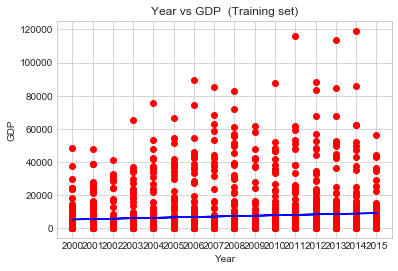

In [45]:
#MLearning
#Creating and Training the Model
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
# We create the object
regressor = LinearRegression()
# We fit the data in the train set
regressor.fit(X_train, y_train)

import matplotlib.pyplot as plt
# Visualising the Training set results
# Show the points in the train set (in red)
plt.scatter(X_train, y_train, color = 'red')
# Show the Regression line for the model (in blue)
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Year vs GDP  (Training set)')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

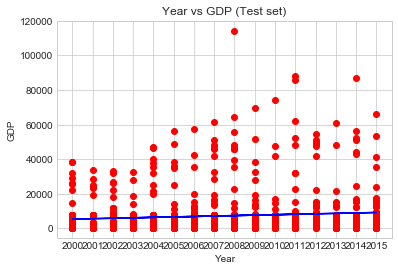

The real GDP
1201      438.864634
1628      487.942556
1317     4863.476650
1392      734.949246
1308      482.247620
1998      359.992184
235      2378.339270
1329    38532.488000
958      4892.116180
2511     4627.592000
2458     2176.898290
2291     1192.517400
212     15534.157400
2266       62.173221
56       2878.837144
1934     1585.132260
913       276.133800
1138     2326.158560
458       248.134590
659       676.153440
768       768.176767
1081      437.446724
1397    51264.713400
2548      148.852738
198       681.125368
2416     1678.711862
228      6519.717530
221     11675.393950
1816      681.792587
2651     1967.832830
            ...     
1265    26241.918830
564      5633.796160
1832    49474.756100
2006     1545.626423
2896     7483.158469
2572     5859.915622
2035       11.553196
1933     2275.353600
2877     7483.158469
722      7483.158469
1807     3288.257373
207        45.633710
633       612.623418
1247     7483.158469
1899      197.661422
252      3743.956930


In [46]:
# Testing the model
# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Visualising the Test set results
# Show the points in the TEST set (in red)
plt.scatter(X_test, y_test, color = 'red')
# Show the Regression line for the model (in blue)
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Year vs GDP (Test set)')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

print("The real GDP")
print(y_test)
print("Predicted GDP")
print(y_pred)

In [47]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 7859.22356675
MSE: 182785516.265
RMSE: 13519.8193873


# Linear Regresion War Countries (Influence of GDP in Adult Mortality)

In [48]:
dfwarcountriesall

,Year,Country,Life expectancy,Adult Mortality,infant deaths,GDP
0,2015,1,65.0,263.0,62,584.259210
1,2014,1,59.9,271.0,64,612.696514
2,2013,1,59.9,268.0,66,631.744976
3,2012,1,59.5,272.0,69,669.959000
4,2011,1,59.2,275.0,71,63.537231
5,2010,1,58.8,279.0,74,553.328940
6,2009,1,58.6,281.0,77,445.893298
7,2008,1,58.1,287.0,80,373.361116
8,2007,1,57.5,295.0,82,369.835796
9,2006,1,57.3,295.0,84,272.563770


In [49]:
# Training and Testing Data
# Adult and infant Mortality Linear Regression 
X = dfwarcountriesall[['Year','GDP']]
y = dfwarcountriesall['Adult Mortality']

In [50]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [51]:
# Training the Model
from sklearn.linear_model import LinearRegression
# Create an instance of a LinearRegression() model named lm.
lm = LinearRegression()
# Train/fit lm on the training data.
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
#Model Evaluation
# print the intercept
print(lm.intercept_)

4046.37952324


In [53]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Year,-1.923714
GDP,-0.002536


In [54]:
# Interpreting the coefficients:
# Holding all other features fixed, a 1 unit increase in Year is associated with a decrease of 1.923714 Adult Mortality
# Holding all other features fixed, a 1 unit increase in GDP is associated with a decrease of 0.002536 Adult Mortality

# Logistic Regression (Predict whether or not a country can be developed or not based off the features of country)

In [55]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,1,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,1,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,1,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,1,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null int64
Year                               2938 non-null int64
Status                             2938 non-null int64
Life expectancy                    2938 non-null float64
Adult Mortality                    2938 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2938 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2938 non-null float64
Measles                            2938 non-null int64
 BMI                               2938 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2938 non-null float64
Total expenditure                  2938 non-null float64
Diphtheria                         2938 non-null float64
 HIV/AIDS                          2938 non-null f

In [57]:
df.describe()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,...,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,92.328455,2007.518720,0.825732,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,...,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,53.044716,4.613841,0.379405,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,...,23.352143,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381
min,1.000000,2000.000000,0.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,...,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,46.000000,2004.000000,1.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,...,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,92.000000,2008.000000,1.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,...,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000
75%,138.000000,2012.000000,1.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,...,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000
max,193.000000,2015.000000,1.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,...,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [58]:
#Create a new Dataset with all countries (2015)
dfdeveloped = df.copy()
#Drop all dates different to year 2015

dfdeveloped.drop(dfdeveloped[dfdeveloped.Year != 2015].index, inplace=True)
dfdeveloped

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1,2015,1,65.0,263.0,62,0.010000,71.279624,65.000000,1154,...,6.0,8.16000,65.0,0.1,584.259210,3.373649e+07,17.200000,17.300000,0.479000,10.100000
16,2,2015,1,77.8,74.0,0,4.600000,364.975229,99.000000,0,...,99.0,6.00000,99.0,0.1,3954.227830,2.887300e+04,1.200000,1.300000,0.762000,14.200000
32,3,2015,1,75.6,19.0,21,4.602861,0.000000,95.000000,63,...,95.0,5.93819,95.0,0.1,4132.762920,3.987153e+07,6.000000,5.800000,0.743000,14.400000
48,4,2015,1,52.4,335.0,66,4.602861,0.000000,64.000000,118,...,7.0,5.93819,64.0,1.9,3695.793748,2.785935e+06,8.300000,8.200000,0.531000,11.400000
64,5,2015,1,76.4,13.0,0,4.602861,0.000000,99.000000,0,...,86.0,5.93819,99.0,0.2,13566.954100,1.275338e+07,3.300000,3.300000,0.784000,13.900000
80,6,2015,1,76.3,116.0,8,4.602861,0.000000,94.000000,0,...,93.0,5.93819,94.0,0.1,13467.123600,4.341776e+07,1.000000,0.900000,0.826000,17.300000
96,7,2015,1,74.8,118.0,1,4.602861,0.000000,94.000000,33,...,96.0,5.93819,94.0,0.1,369.654776,2.916950e+05,2.100000,2.200000,0.741000,12.700000
112,8,2015,0,82.8,59.0,1,4.602861,0.000000,93.000000,74,...,93.0,5.93819,93.0,0.1,56554.387600,2.378934e+07,0.600000,0.600000,0.937000,20.400000
128,9,2015,0,81.5,65.0,0,4.602861,0.000000,93.000000,309,...,93.0,5.93819,93.0,0.1,43665.947000,8.633169e+06,1.900000,2.100000,0.892000,15.900000
144,10,2015,1,72.7,118.0,5,4.602861,0.000000,96.000000,0,...,98.0,5.93819,96.0,0.1,55.313820,9.649341e+06,2.800000,2.900000,0.758000,12.700000


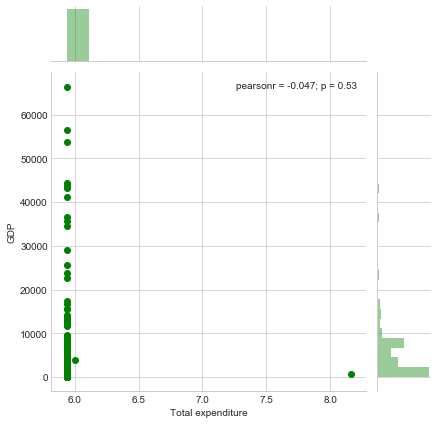

In [59]:
sns.jointplot(x='Total expenditure',y='GDP',data=dfdeveloped,color='green')

In [60]:
#Logistic Regression
#Split data into training set and testing set using train_test_split
from sklearn.model_selection import train_test_split
X = dfdeveloped[['Total expenditure', 'GDP', 'Schooling','Income composition of resources']]
y = dfdeveloped['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [61]:
#Train and fit a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
#Predictions and Evaluations
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.67      0.15      0.25        13
          1       0.81      0.98      0.89        48

avg / total       0.78      0.80      0.75        61



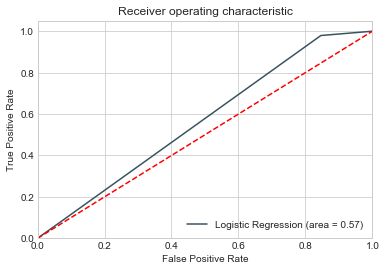

In [63]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, predictions)
fpr, tpr, thresholds = roc_curve(y_test, predictions)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# K Means Clustering (under-five deaths,infant deaths,Adult Mortality)

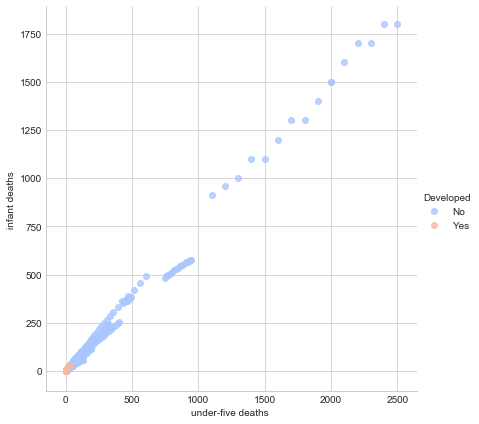

In [64]:
# Exploratory Data Analysis
df['Status'] = df['Status'].replace([0, 1],['Yes', 'No'])
df.rename(columns={'Status':'Developed'}, inplace=True)
#Show all infant deads
sns.set_style('whitegrid')
sns.lmplot('under-five deaths ','infant deaths',data=df, hue='Developed',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

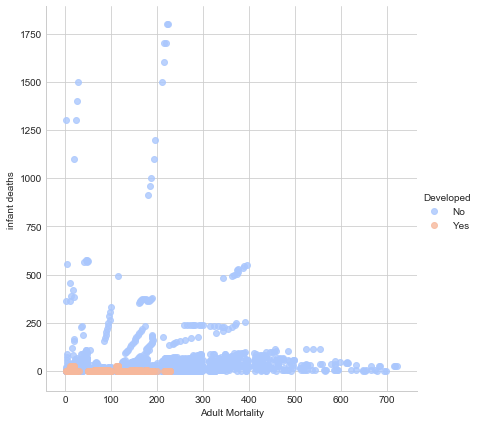

In [65]:
#Show all Adult Mortality
sns.set_style('whitegrid')
sns.lmplot('Adult Mortality','infant deaths',data=df, hue='Developed',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

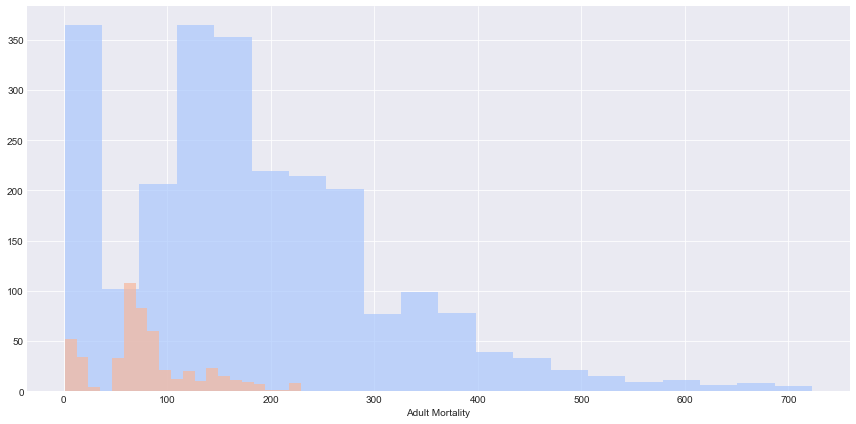

In [66]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Developed",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Adult Mortality',bins=20,alpha=0.7)

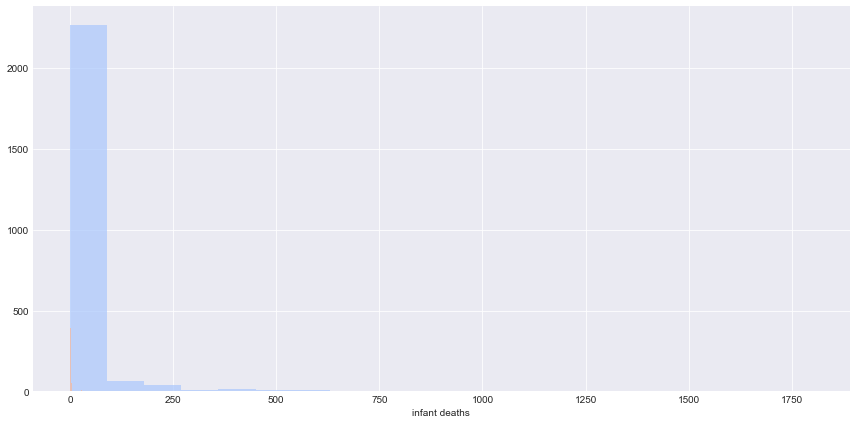

In [67]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Developed",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'infant deaths',bins=20,alpha=0.7)

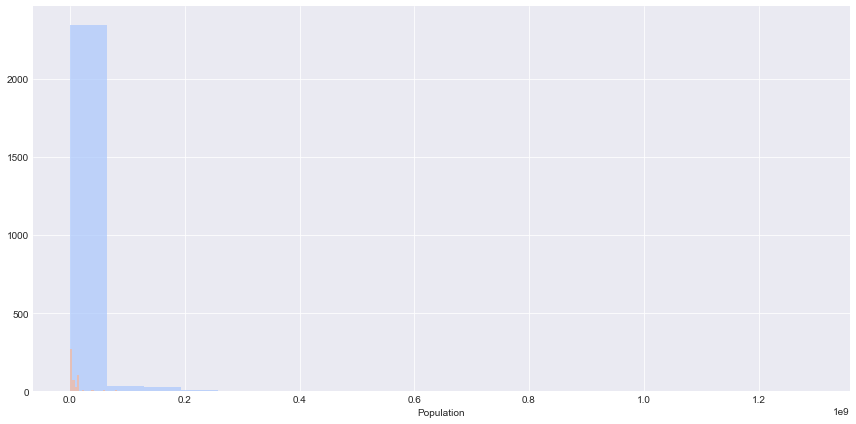

In [68]:
#Population Developed vs not Developed countries
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Developed",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Population',bins=20,alpha=0.7)

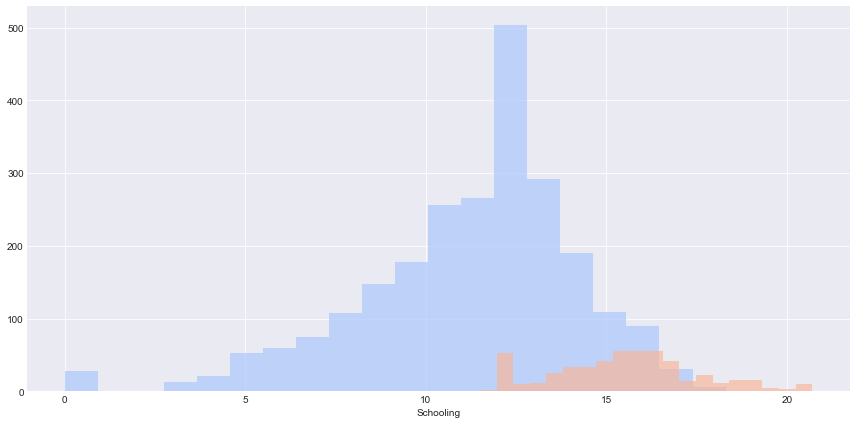

In [69]:
#Schooling Developed vs not Developed countries
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Developed",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Schooling',bins=20,alpha=0.7)

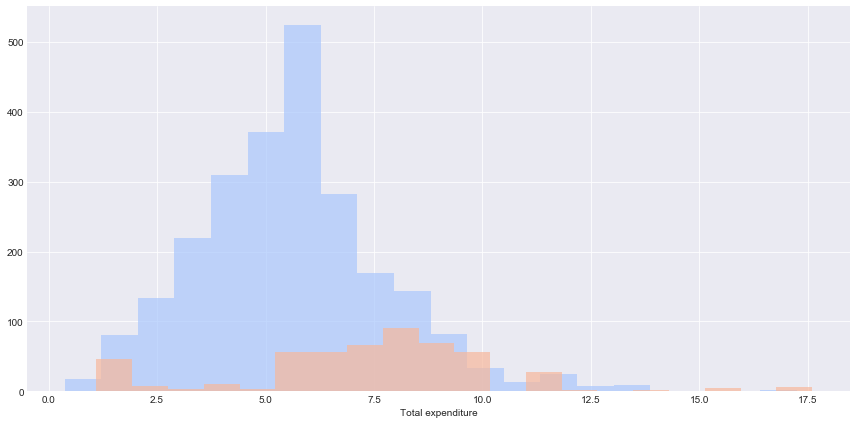

In [70]:
#Total expenditure Developed vs not Developed countries
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Developed",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Total expenditure',bins=20,alpha=0.7)

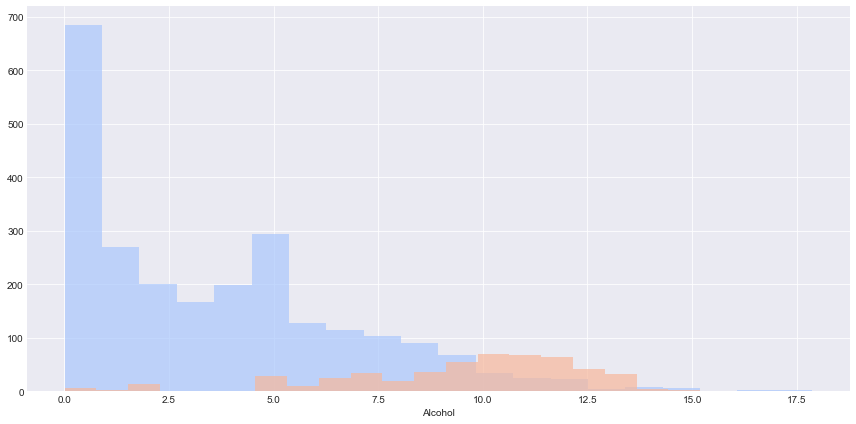

In [71]:
#Alcohol Developed vs not Developed countries
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Developed",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Alcohol',bins=20,alpha=0.7)

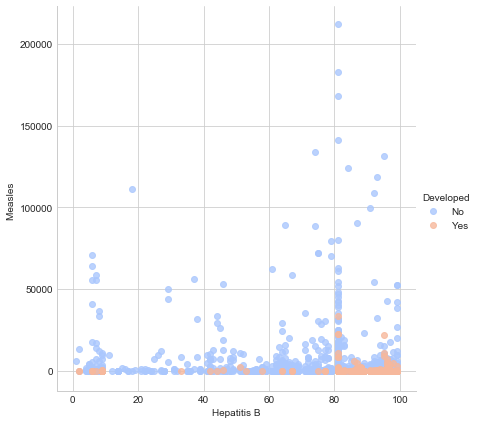

In [72]:
#Show diseases Developed vs Not Developed countries
sns.set_style('whitegrid')
sns.lmplot('Hepatitis B','Measles ',data=df, hue='Developed',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

In [73]:
#Kmeans cluster creation
from sklearn.cluster import KMeans
#Define number of clusters
kmeans = KMeans(n_clusters=2)
#Fit all the model less Developed column
kmeans.fit(df.drop('Developed',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [74]:
#Guessing cluster center vectors
kmeans.cluster_centers_

array([[  9.23579952e+01,   2.00751926e+03,   6.92316568e+01,
          1.64851335e+02,   2.79836345e+01,   4.60780941e+00,
          7.39456135e+02,   8.10426441e+01,   2.32925878e+03,
          3.83617192e+01,   3.89706785e+01,   8.25749927e+01,
          5.94092425e+00,   8.23478205e+01,   1.74459598e+00,
          7.49483017e+03,   1.07615559e+07,   4.80178995e+00,
          4.83098901e+00,   6.27689065e-01,   1.19962582e+01],
       [  7.50000000e+01,   2.00720000e+03,   6.52800000e+01,
          1.32600000e+02,   1.39140000e+03,   1.70000000e+00,
          3.14926763e+01,   2.10000000e+01,   5.54092000e+04,
          1.45800000e+01,   1.84000000e+03,   6.80000000e+01,
          4.33400000e+00,   6.84000000e+01,   2.80000000e-01,
          6.36536468e+02,   1.18115454e+09,   2.70800000e+01,
          2.79400000e+01,   5.46600000e-01,   9.96000000e+00]])

In [75]:
#Evaluation
#Create a new column for df called Cluster which value 1 for devoloped country and 0 for not developed country
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0
df['Cluster'] = df['Developed'].apply(converter)
df

,Country,Year,Developed,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Cluster
0,1,2015,No,65.0,263.0,62,0.010000,71.279624,65.000000,1154,...,8.16000,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0
1,1,2014,No,59.9,271.0,64,0.010000,73.523582,62.000000,492,...,8.18000,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0
2,1,2013,No,59.9,268.0,66,0.010000,73.219243,64.000000,430,...,8.13000,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0
3,1,2012,No,59.5,272.0,69,0.010000,78.184215,67.000000,2787,...,8.52000,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0
4,1,2011,No,59.2,275.0,71,0.010000,7.097109,68.000000,3013,...,7.87000,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0
5,1,2010,No,58.8,279.0,74,0.010000,79.679367,66.000000,1989,...,9.20000,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2,0
6,1,2009,No,58.6,281.0,77,0.010000,56.762217,63.000000,2861,...,9.42000,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9,0
7,1,2008,No,58.1,287.0,80,0.030000,25.873925,64.000000,1599,...,8.33000,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7,0
8,1,2007,No,57.5,295.0,82,0.020000,10.910156,63.000000,1141,...,6.73000,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4,0
9,1,2006,No,57.3,295.0,84,0.030000,17.171518,64.000000,1990,...,7.43000,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1,0


In [76]:
#Create a confusion matrix and classification report
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print(classification_report(df['Cluster'],kmeans.labels_))

[[2421    5]
 [ 512    0]]
             precision    recall  f1-score   support

          0       0.83      1.00      0.90      2426
          1       0.00      0.00      0.00       512

avg / total       0.68      0.82      0.75      2938

